In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})


# 1. Exploring the data

1.

In [544]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [545]:
Pokemon = pd.read_csv("modelling_expert_test/pokemon.csv")

In [708]:
Combats = pd.read_csv("modelling_expert_test/combats.csv")

In [547]:
Pokemon.head()

pid           Name Class 1 Class 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0    1      Bulbasaur   Grass  Poison  45      49       49       65       65   
1    2        Ivysaur   Grass  Poison  60      62       63       80       80   
2    3       Venusaur   Grass  Poison  80      82       83      100      100   
3    4  Mega Venusaur   Grass  Poison  80     100      123      122      120   
4    5     Charmander    Fire     NaN  39      52       43       60       50   

   Speed  Legendary  
0     45      False  
1     60      False  
2     80      False  
3     80      False  
4     65      False

In [548]:
Combats.head()

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

(a)

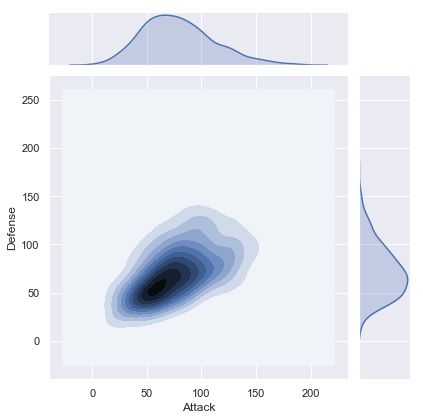

In [549]:
sns.jointplot(x="Attack",y="Defense",data=Pokemon,kind="kde")

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


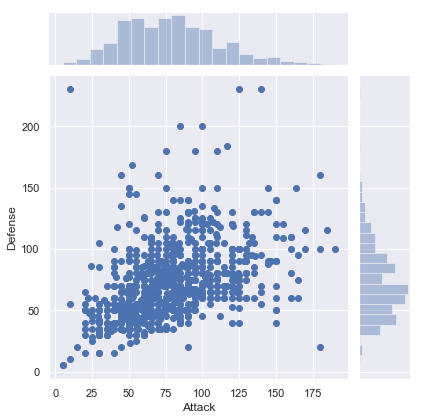

In [550]:
sns.jointplot(x="Attack",y="Defense",data=Pokemon)

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


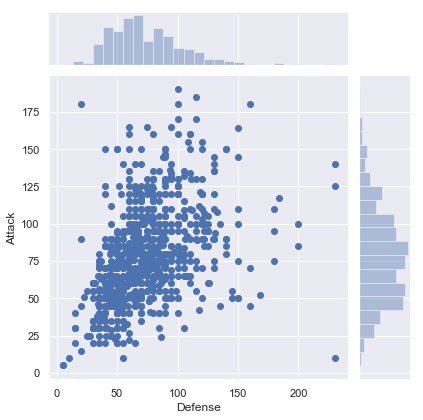

In [551]:
sns.jointplot(x="Defense",y="Attack",data=Pokemon)

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


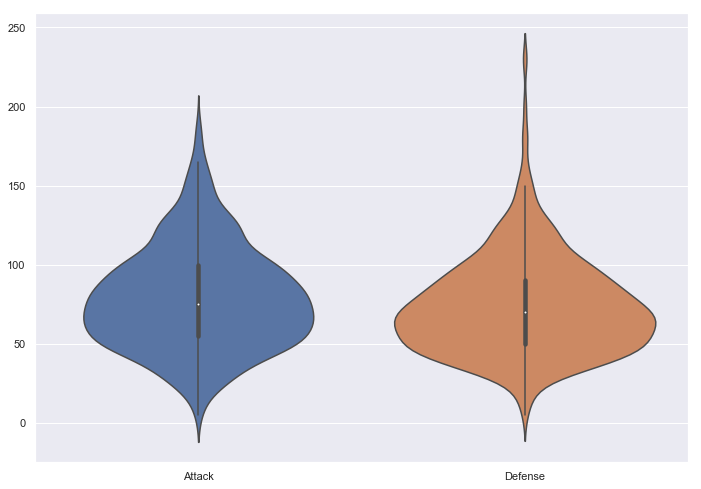

In [552]:
sns.violinplot(data=Pokemon[["Attack","Defense"]])

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


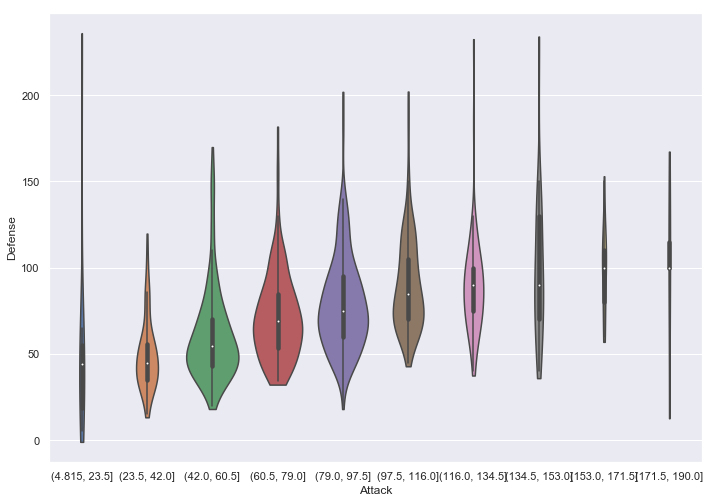

In [553]:
sns.violinplot(x=pd.cut(Pokemon.Attack,bins=10),y=Pokemon.Defense,
               scale="count",cut=0.2)

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


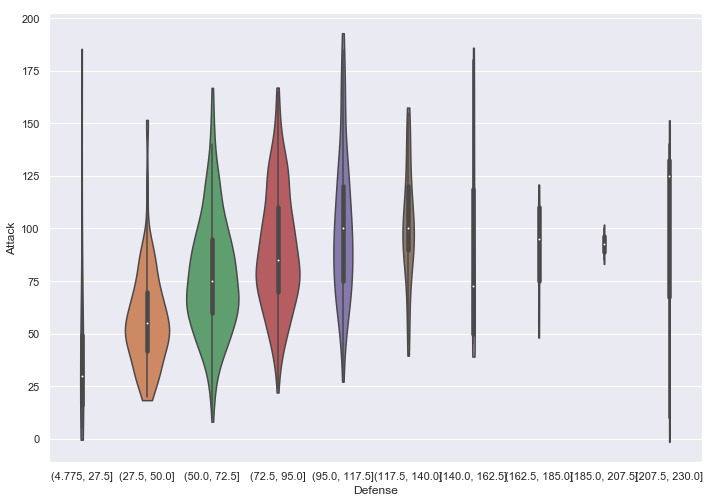

In [554]:
sns.violinplot(x=pd.cut(Pokemon.Defense,bins=10),y=Pokemon.Attack,
               scale="count",cut=0.2)

In [555]:
Pokemon["AttackOverDefense"] = Pokemon.Attack/Pokemon.Defense

The two distributions seem to be relatively similar, except that "Defense" has some outliers.
From the joint plot we can see that the smaller Attack and Defense are, the more similar they tend to be. If the Attack is higher, then it seems that there is more variability for Defense, also the distribution have more chance to have high Defense outliers when the Attack is larger. Also for strong Attacks, it seems that Attack tends to be larger than Defense and for weak Attacks Defense seems tend to be larger. 

In [556]:
Pokemon["AttackOverDefense"] = Pokemon.Attack/Pokemon.Defense

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


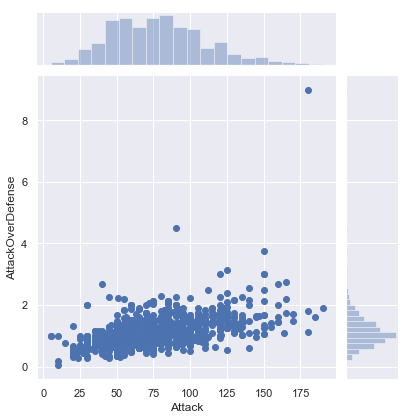

In [557]:
sns.jointplot(x="Attack",y="AttackOverDefense",data=Pokemon)


(b)

In [558]:
Pokemon.sort_values(by="AttackOverDefense",ascending=False).head(3)

pid                Name  Class 1 Class 2  HP  Attack  Defense  Sp. Atk  \
429  430  DeoxysAttack Forme  Psychic     NaN  50     180       20      180   
347  348            Carvanha    Water    Dark  45      90       20       65   
19    20       Mega Beedrill      Bug  Poison  65     150       40       15   

     Sp. Def  Speed  Legendary  AttackOverDefense  
429       20    150       True               9.00  
347       20     65      False               4.50  
19        80    145      False               3.75

(c)

In [559]:
#INDEXING ERROR IN LAST VERSION
Pokemon.loc[Combats.Winner.value_counts().index[:10] - 1]

pid                Name  Class 1   Class 2   HP  Attack  Defense  \
162  163              Mewtwo  Psychic       NaN  106     110       90   
153  154          Aerodactyl     Rock    Flying   80     105       65   
437  438           Infernape     Fire  Fighting   76     104       71   
427  428             Jirachi    Steel   Psychic  100     100      100   
431  432  Deoxys Speed Forme  Psychic       NaN   50      95       90   
313  314             Slaking   Normal       NaN  150     160      100   
213  214             Murkrow     Dark    Flying   60      85       42   
393  394          Mega Absol     Dark       NaN   65     150       60   
248  249       Mega Houndoom     Dark      Fire   75      90       90   
154  155     Mega Aerodactyl     Rock    Flying   80     135       85   

     Sp. Atk  Sp. Def  Speed  Legendary  AttackOverDefense  
162      154       90    130       True           1.222222  
153       60       75    130      False           1.615385  
437      104       71    108      False           1.464789  
427      100      100    100       True           1.000000  
431       95       90    180       True           1.055556  
313       95       65    100      False           1.600000  
213       85       42     91      False           2.023810  
393      115       60    115      False           2.500000  
248      140       90    115      False           1.000000  
154       70       95    150      False           1.588235

2.

In [560]:
#Check some properties of the Class features

In [561]:
sum(Pokemon["Class 1"] == Pokemon["Class 2"])

0

In [562]:
Pokemon["Class 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [563]:
Pokemon["Class 2"].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [564]:
#Pokemons belonging to one class only
PokeR = Pokemon.loc[(Pokemon["Class 1"].isin(["Rock","Grass"])) ^ (Pokemon["Class 2"].isin(["Rock","Grass"]))]

In [565]:
PokeRock = PokeR.loc[(PokeR["Class 1"] == "Rock") | (PokeR["Class 2"] == "Rock")]

In [566]:
PokeGrass = PokeR.loc[(PokeR["Class 1"] == "Grass") | (PokeR["Class 2"] == "Grass")]

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


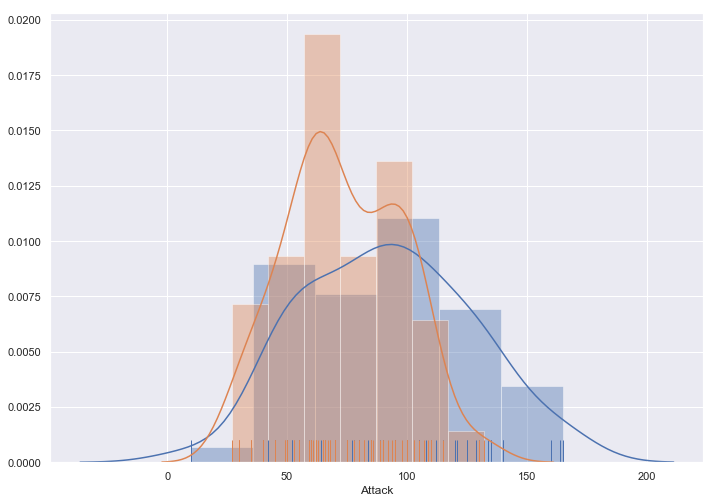

In [567]:
sns.distplot(PokeRock.Attack,kde=True,rug=True,label="Rock")
sns.distplot(PokeGrass.Attack,kde=True,rug=True,label="Grass")

Pokemons in the class Rock seem to have a stronger attack than the one in the class Grass. We extract some statistics for the two classes.

In [568]:
(PokeRock.Attack.min(),PokeRock.Attack.max())

(10, 165)

In [569]:
(PokeGrass.Attack.min(),PokeGrass.Attack.max())

(27, 132)

In [570]:
CategRock = pd.cut(PokeRock.Attack,20,)

In [571]:
CategGrass = pd.cut(PokeGrass.Attack,bins=CategRock.cat.categories)

In [572]:
len(PokeRock),len(PokeGrass)

(56, 93)

In [573]:
PokeRock.Attack.std()

34.80528396964738

In [574]:
PokeRock.Attack.mean()

91.78571428571429

In [575]:
PokeGrass.Attack.std()

24.179644594497713

In [576]:
PokeGrass.Attack.mean()

73.73118279569893

The standard deviations are roughly the same but the mean is higher for the PokeRock, we could use other descriptive statistics, and a statistical test

**Improvement**

To check if the Professor is right we do a small experiment where we randomly pick pokemons from the two classes and compare their attack. We see that 2 times out of 3 a Rock Pokemon have stronger attacks than a Grass Pokemon, so in that sense he is not right. If we consider kind of group attacks then maybe the result would be different.

In [577]:
Counts = list()

#to check convergence several n values (just an example so did not do it for enough values)
for n in [10,50,100,200,500,1000,10000,50000,100000]:
    Count = 0
    for i in range(n):
        Count += (PokeGrass.Attack.sample().values[0] > PokeRock.Attack.sample().values[0])
    Counts.append(Count)

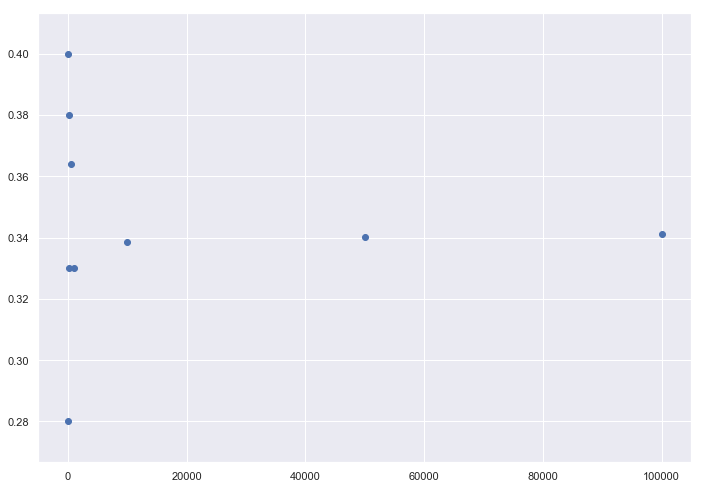

In [578]:
plt.scatter([10,50,100,200,500,1000,10000,50000,100000],
         np.array(Counts)/np.array([10,50,100,200,500,1000,10000,50000,100000]))

In [579]:
#Checking that we get 1/2 for Pokemon in the same class

In [580]:
Count = 0
for i in range(10000):
        Count += (PokeRock.Attack.sample().values[0] > PokeRock.Attack.sample().values[0])

Count/10000

0.4813

In [581]:
Count = 0
for i in range(10000):
        Count += (PokeGrass.Attack.sample().values[0] > PokeGrass.Attack.sample().values[0])

Count/10000

0.4855

## 2. Prediction

### 1. Feature preprocessing, generation

I start with the features of one Pokemon

In [829]:
#Basic preprocessing from previous steps
Pokemon = pd.read_csv("modelling_expert_test/pokemon.csv")
Combats = pd.read_csv("modelling_expert_test/combats.csv")
Pokemon["AttackOverDefense"] = Pokemon.Attack/Pokemon.Defense


In [830]:
#NAs
Pokemon.isna().sum()

pid                    0
Name                   1
Class 1                0
Class 2              386
HP                     0
Attack                 0
Defense                0
Sp. Atk                0
Sp. Def                0
Speed                  0
Legendary              0
AttackOverDefense      0
dtype: int64

In [831]:
#Add a category for NAs for Class 2, by prior knowledge of pokemons we assume it means Only One Class
Pokemon["Class 2"] = Pokemon["Class 2"].fillna("OneClass")

In [832]:
#One pokemon name is na, I name it NaN

In [833]:
Pokemon.Name = Pokemon.Name.fillna("NaN")

Name feature analysis, Concluded that maybe it is not worth it

In [834]:
#Also this small modif

In [835]:
Pokemon.Name.loc[Pokemon.Name == "DeoxysAttack Forme"] = "Deoxys Attack Forme"

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [814]:
NotComposedName = Pokemon.Name.loc[~Pokemon.Name.str.contains(" ")]
#not composed name are unique

In [786]:
ComposedName = Pokemon.Name.loc[Pokemon.Name.str.contains(" ")]

In [787]:
Words = ComposedName.str.cat(sep=" ").split()

In [788]:
EvolvedPokemon = [s for s in Words if sum(NotComposedName == s) ]

In [789]:
OtherWords = [s for s in Words if not sum(NotComposedName == s)]

In [790]:
#Pokemons with Forme
FormePoke =Pokemon.Name.loc[Pokemon.Name.str.contains("Forme")]
FormePoke

428          Deoxys Normal Forme
429          Deoxys Attack Forme
430         Deoxys Defense Forme
431           Deoxys Speed Forme
544       Giratina Altered Forme
545        Giratina Origin Forme
550           Shaymin Land Forme
551            Shaymin Sky Forme
702     Tornadus Incarnate Forme
703       Tornadus Therian Forme
704    Thundurus Incarnate Forme
705      Thundurus Therian Forme
708     Landorus Incarnate Forme
709       Landorus Therian Forme
713        Keldeo Ordinary Forme
714        Keldeo Resolute Forme
715          Meloetta Aria Forme
716     Meloetta Pirouette Forme
750        Aegislash Blade Forme
751       Aegislash Shield Forme
794           Zygarde Half Forme
Name: Name, dtype: object

In [791]:
Formes = FormePoke.str.split().apply(lambda s:s[1])
Originals = FormePoke.str.split().apply(lambda s:s[0])

In [792]:
pd.Series(OtherWords).loc[~pd.Series(OtherWords).isin(Originals.append(Formes))].value_counts()

Mega          48
Forme         21
Size           8
Gourgeist      4
Pumpkaboo      4
Cloak          3
Wormadam       3
Primal         2
Large          2
Darmanitan     2
Hoopa          2
Y              2
Small          2
Meowstic       2
Average        2
Mime           2
Mode           2
Super          2
X              2
Jr.            1
Mr.            1
Female         1
Male           1
Unbound        1
Sandy          1
Zen            1
Black          1
Trash          1
Frost          1
Standard       1
Heat           1
Confined       1
Mow            1
White          1
Plant          1
Wash           1
Fan            1
dtype: int64

Could use a categorical variable "Forme", and a binary variable "Mega"... but maybe not worth it, it does apply to a lot of pokemon, so we would do this to refine a model

In [836]:
#checking how much pokemon are involved in fights
Combats.First_pokemon.append(Combats.Second_pokemon).nunique(), len(Pokemon)

(784, 800)

In [837]:
#Remove Name feature, because of previous analysis
PokemonM = Pokemon.loc[:,Pokemon.columns != "Name"]

In [795]:
#I think there is no need to normalize because the numerical features seem to 
#have similar ranges and also from prior knowledge of pokemons, one the absolute values
#of these features are used to compute the outcome of a move in a fight (not sure)
#otherwise use sklearn.preprocessing.Normalizer

In [838]:
PokemonM.dtypes

pid                    int64
Class 1               object
Class 2               object
HP                     int64
Attack                 int64
Defense                int64
Sp. Atk                int64
Sp. Def                int64
Speed                  int64
Legendary               bool
AttackOverDefense    float64
dtype: object

In [839]:
# Now use LabelEncoder on Categorical variables
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

PokemonM["Class 1"] = Encoder.fit_transform(PokemonM["Class 1"],)
PokemonM["Class 2"] = Encoder.fit_transform(PokemonM["Class 2"],)

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [798]:
#Could use a product between classes

Preprocessing for Fights

In [840]:
#Realized that preprocessing has to be done after merging
#The response variable is as "First pokemon won"
Combats["Winner"] = Combats.First_pokemon == Combats.Winner

In [841]:
Combats["Winner"] = Encoder.fit_transform(Combats["Winner"],)

In [801]:
#From prior knowledge on pokemons most of the characteristics of pokemon can explain the 
#outcome of a fight but in case there are some other that we do not know, we can keep
#the id of the two pokemons for now, then we will select variables

In [842]:
Combats.First_pokemon = Encoder.fit_transform(Combats.First_pokemon,)
Combats.Second_pokemon = Encoder.fit_transform(Combats.Second_pokemon,)

Now let's join the dataframes together and create new crossed features

In [843]:
ColNames = PokemonM.columns.values.copy()

In [844]:
PokemonFirst = PokemonM.copy()

PokemonFirst.columns.values[0] = "First_pokemon"

PokemonFirst.columns.values[1:] = "First" + ColNames[1:]

In [845]:
CombatsM = pd.merge(Combats,PokemonFirst,on="First_pokemon",sort=False)

In [846]:
CombatsM.Winner.sum()

23589

In [847]:
ColNames

array(['pid', 'Class 1', 'Class 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Legendary', 'AttackOverDefense'], dtype=object)

In [848]:
PokemonM.columns

Index(['First_pokemon', 'FirstClass 1', 'FirstClass 2', 'FirstHP',
       'FirstAttack', 'FirstDefense', 'FirstSp. Atk', 'FirstSp. Def',
       'FirstSpeed', 'FirstLegendary', 'FirstAttackOverDefense'],
      dtype='object')

In [849]:
PokemonSecond = PokemonM.copy()

PokemonSecond.columns.values[0] = "Second_pokemon"

PokemonSecond.columns.values[1:] = "Second" + ColNames[1:]

In [850]:
CombatsMM = pd.merge(CombatsM,PokemonSecond,on="Second_pokemon",sort=False)

In [851]:
CombatsMM.dtypes

First_pokemon                int64
Second_pokemon               int64
Winner                       int64
FirstClass 1                 int64
FirstClass 2                 int64
FirstHP                      int64
FirstAttack                  int64
FirstDefense                 int64
FirstSp. Atk                 int64
FirstSp. Def                 int64
FirstSpeed                   int64
FirstLegendary                bool
FirstAttackOverDefense     float64
SecondClass 1                int64
SecondClass 2                int64
SecondHP                     int64
SecondAttack                 int64
SecondDefense                int64
SecondSp. Atk                int64
SecondSp. Def                int64
SecondSpeed                  int64
SecondLegendary               bool
SecondAttackOverDefense    float64
dtype: object

In [859]:
CombatsMM.head()

First_pokemon  Second_pokemon  Winner  FirstClass 1  FirstClass 2  FirstHP  \
0            256             288       0             5            13       35   
1             68             288       0            17             5       90   
2            362             288       0            10             2       80   
3            523             288       1            11            13       65   
4            357             288       1            14            13       60   

   FirstAttack  FirstDefense  FirstSp. Atk  FirstSp. Def       ...         \
0           35            35            35            35       ...          
1           95            95            70            90       ...          
2          100            80            80            80       ...          
3           60           110           130            95       ...          
4           25            35            70            80       ...          

   SecondSp. Atk  SecondSp. Def  SecondSpeed  SecondLegendary  \
0             50             61          100            False   
1             50             61          100            False   
2             50             61          100            False   
3             50             61          100            False   
4             50             61          100            False   

   SecondAttackOverDefense  AttackDiff  DefenseDiff  HPDiff  SpeedDiff  \
0                 1.147541         -35          -26     -43        -65   
1                 1.147541          25           34      12        -30   
2                 1.147541          30           19       2          0   
3                 1.147541         -10           49     -13        -35   
4                 1.147541         -45          -26     -18        -40   

   NbMatchingClass  
0                1  
1                0  
2                0  
3                1  
4                1  

[5 rows x 28 columns]

In [867]:
len(CombatsMM),len(Combats),sum(CombatsMM.Winner),sum(Combats.Winner)

(49867, 50000, 23551, 23601)

In [1442]:
#we could do this for every numerical feature (also ratio)

CombatsMM["AttackDiff"] = CombatsMM.FirstAttack - CombatsMM.SecondAttack
CombatsMM["DefenseDiff"] = CombatsMM.FirstDefense -CombatsMM.SecondDefense

In [853]:
CombatsMM["HPDiff"] = CombatsMM.FirstHP - CombatsMM.SecondHP
CombatsMM["SpeedDiff"] = CombatsMM.FirstSpeed - CombatsMM.SecondSpeed

In [865]:
#Are Pokemons of different classes
CombatsMM["NbMatchingClass"] = 1*(CombatsMM["FirstClass 1"] == CombatsMM["SecondClass 1"]) + 1*(CombatsMM["FirstClass 2"] == CombatsMM["SecondClass 2"])

In [866]:
CombatsMM.dtypes

First_pokemon                int64
Second_pokemon               int64
Winner                       int64
FirstClass 1                 int64
FirstClass 2                 int64
FirstHP                      int64
FirstAttack                  int64
FirstDefense                 int64
FirstSp. Atk                 int64
FirstSp. Def                 int64
FirstSpeed                   int64
FirstLegendary                bool
FirstAttackOverDefense     float64
SecondClass 1                int64
SecondClass 2                int64
SecondHP                     int64
SecondAttack                 int64
SecondDefense                int64
SecondSp. Atk                int64
SecondSp. Def                int64
SecondSpeed                  int64
SecondLegendary               bool
SecondAttackOverDefense    float64
AttackDiff                   int64
DefenseDiff                  int64
HPDiff                       int64
SpeedDiff                    int64
NbMatchingClass              int64
dtype: object

In [868]:
CombatsMM["FirstClass 1"] = Encoder.fit_transform(CombatsMM["FirstClass 1"],)
CombatsMM["FirstClass 2"] = Encoder.fit_transform(CombatsMM["FirstClass 2"],)
CombatsMM["SecondClass 1"] = Encoder.fit_transform(CombatsMM["SecondClass 1"],)
CombatsMM["SecondClass 2"] = Encoder.fit_transform(CombatsMM["SecondClass 2"],)

### 2. Training different models and evaluating their performances

While trying out some models we can look at the feature importance

Start with Tree based model

In [1080]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

With all features first, RandomForest and GBDT

In [1076]:
#No class imbalance
sum(CombatsMM.Winner)/len(CombatsMM)

0.4722762548378687

In [1216]:
X = CombatsMM.loc[:,CombatsMM.columns != "Winner"]
y = CombatsMM.Winner

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

RandomForest

In [1077]:
RF = RandomForestClassifier(min_samples_split=5,max_depth=12,
                            n_estimators=50,random_state=45)

RF.fit(X_train,y_train)

PredsRFin = RF.predict(X_train)
PredsRFout = RF.predict(X_test)

#No class imbalance, so accuracy is fine
1 - sum(np.abs(PredsRFin - y_train))/len(y_train),1 - sum(np.abs(PredsRFout - y_test))/len(y_test)

(0.8569172536535232, 0.7448365750952477)

In [1092]:
RF.score(X_test,y_test)

0.7448365750952477

In [1223]:
#CV, 5-Fold
CVScores = cross_val_score(X=X,y=y,
                           cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=32),
                           estimator=RF)

In [1224]:
CVScores.mean(),CVScores.std()

(0.7455832602663783, 0.0038488183796635414)

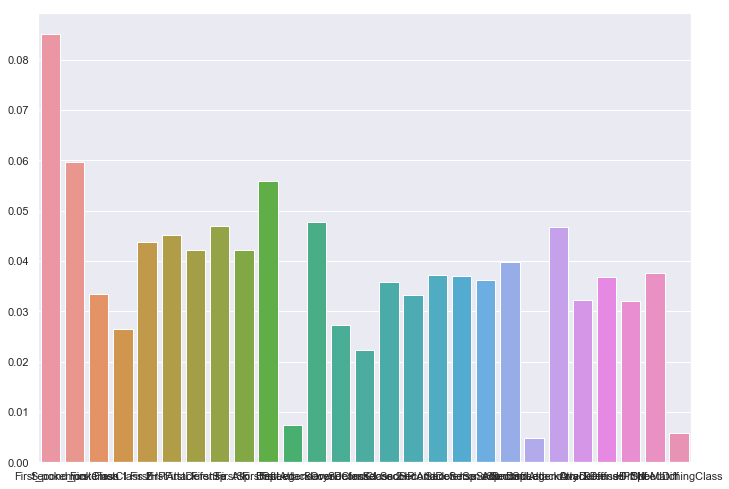

In [1078]:
sns.barplot(X_train.columns,RF.feature_importances_)

In [1069]:
X_train.columns.values[RF.feature_importances_ > 0.04]

array(['First_pokemon', 'Second_pokemon', 'FirstHP', 'FirstAttack',
       'FirstDefense', 'FirstSp. Atk', 'FirstSp. Def', 'FirstSpeed',
       'FirstAttackOverDefense', 'SecondAttackOverDefense', 'SpeedDiff'],
      dtype=object)

GBDT

In [1089]:
GB = GradientBoostingClassifier(min_samples_split=5,max_leaf_nodes=8,
                                n_estimators=1000,random_state=5,
                                verbose=True)

GB.fit(X_train,y_train)

PredsGBin = GB.predict(X_train)
PredsGBout = GB.predict(X_test)

#Accuracy 
1 - sum(np.abs(PredsGBin - y_train))/len(y_train),1 - sum(np.abs(PredsGBout - y_test))/len(y_test)

      Iter       Train Loss   Remaining Time 
         1           1.3791            1.08m
         2           1.3754            1.06m
         3           1.3706           59.26s
         4           1.3665            1.01m
         5           1.3638           59.07s
         6           1.3597           56.66s
         7           1.3566           56.74s
         8           1.3536           55.68s
         9           1.3511           54.48s
        10           1.3479           53.86s
        20           1.3212           49.10s
        30           1.2984           47.88s
        40           1.2803           45.61s
        50           1.2600           44.43s
        60           1.2447           42.84s
        70           1.2292           41.79s
        80           1.2155           41.14s
        90           1.2014           40.37s
       100           1.1899           39.56s
       200           1.0878           33.60s
       300           1.0140           29.26s
       40

(0.8674203494347379, 0.8302586725486264)

In [1217]:
#CV, 5-Fold
CVScores0 = CVScores = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True,
                                                      random_state=32),
                           estimator=GB,n_jobs=2)
CVScores0.mean(),CVScores0.std()

(0.834981101605915, 0.004148375262975193)

In [1220]:
np.round(CVScores0.mean(),2),CVScores0.std()

(0.83, 0.004148375262975193)

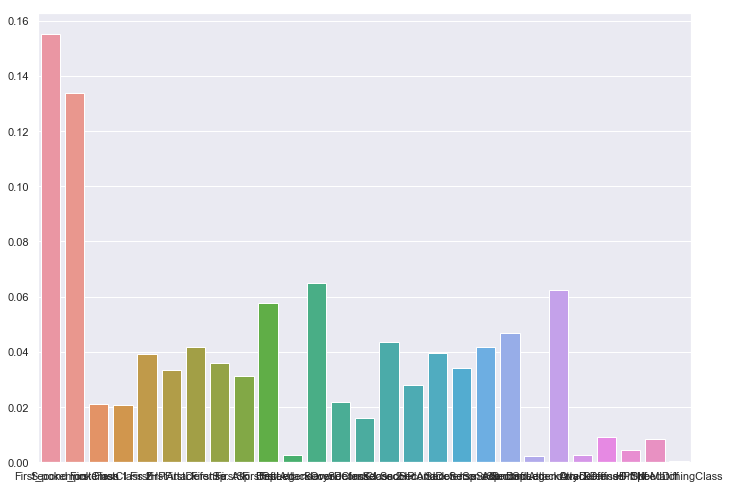

In [1098]:
sns.barplot(X_train.columns,GB.feature_importances_)

In [1225]:
sel = X_train.columns.values[GB.feature_importances_ < 0.12]
sel

array(['FirstClass 1', 'FirstClass 2', 'FirstHP', 'FirstAttack',
       'FirstDefense', 'FirstSp. Atk', 'FirstSp. Def', 'FirstSpeed',
       'FirstLegendary', 'FirstAttackOverDefense', 'SecondClass 1',
       'SecondClass 2', 'SecondHP', 'SecondAttack', 'SecondDefense',
       'SecondSp. Atk', 'SecondSp. Def', 'SecondSpeed', 'SecondLegendary',
       'SecondAttackOverDefense', 'AttackDiff', 'DefenseDiff', 'HPDiff',
       'SpeedDiff', 'NbMatchingClass'], dtype=object)

It seems that second and first pokemons are quite important.

small interactive plot next

In [1141]:
import ipywidgets
import warnings
warnings.filterwarnings('ignore')

In [1145]:
@ipywidgets.interact(Name = Pokemon.Name,l=(1,20))
def displai(Name=Pokemon.Name[0]):
    PokemonID = Pokemon.loc[Pokemon.Name== Name,"pid"].values[0]
    SubCombats = CombatsMM.loc[CombatsMM.First_pokemon == PokemonID]
    SubCombats["SecondName"] = CombatsMM.Second_pokemon.map(pd.Series(Pokemon.Name,
                                                                      index=Pokemon.pid))
    SubCombats["Outcome"] = SubCombats.Winner.map(pd.Series(["Lost","Won"],index=[0,1]))
    sns.scatterplot(x="Outcome",y="SecondName",data=SubCombats)

interactive(children=(Dropdown(description='Name', options=('Bulbasaur', 'Ivysaur', 'Venusaur', 'Mega Venusaur…

Using the IDs of the two pokemons is like reading in a 2D grid of historical fights between pokemons and saying who won or lose the last fight/majority of fights

Let's try without these features

In [1226]:
sel

array(['FirstClass 1', 'FirstClass 2', 'FirstHP', 'FirstAttack',
       'FirstDefense', 'FirstSp. Atk', 'FirstSp. Def', 'FirstSpeed',
       'FirstLegendary', 'FirstAttackOverDefense', 'SecondClass 1',
       'SecondClass 2', 'SecondHP', 'SecondAttack', 'SecondDefense',
       'SecondSp. Atk', 'SecondSp. Def', 'SecondSpeed', 'SecondLegendary',
       'SecondAttackOverDefense', 'AttackDiff', 'DefenseDiff', 'HPDiff',
       'SpeedDiff', 'NbMatchingClass'], dtype=object)

In [1256]:
X = CombatsMM.loc[:,sel]
y = CombatsMM.Winner

In [1257]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

In [1189]:
RF1 = RandomForestClassifier(min_samples_split=5,max_depth=12,
                            n_estimators=50,random_state=45)

RF1.fit(X_train,y_train)

PredsRFin = RF1.predict(X_train)
PredsRFout = RF1.predict(X_test)

#No class imbalance, so accuracy is fine
1 - sum(np.abs(PredsRFin - y_train))/len(y_train),1 - sum(np.abs(PredsRFout - y_test))/len(y_test)

(0.8446594640663776, 0.7394224984960898)

In [1190]:
RF1.score(X_test,y_test),RF1.score(X_train,y_train)

(0.7394224984960899, 0.8446594640663776)

In [1212]:
#CV, 5-Fold
CVScores = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True,
                                                      random_state=32),
                           estimator=RF1)
CVScores.mean(),CVScores.std()

(0.7345741170332831, 0.0038825191925702983)

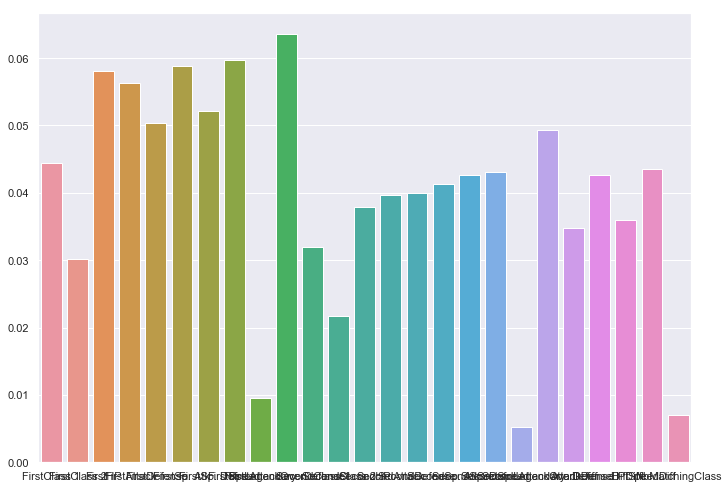

In [1180]:
sns.barplot(X_train.columns,RF1.feature_importances_)

In [1182]:
X_train.columns.values[RF1.feature_importances_ > 0.04]

array(['FirstClass 1', 'FirstHP', 'FirstAttack', 'FirstDefense',
       'FirstSp. Atk', 'FirstSp. Def', 'FirstSpeed',
       'FirstAttackOverDefense', 'SecondSp. Atk', 'SecondSp. Def',
       'SecondSpeed', 'SecondAttackOverDefense', 'DefenseDiff',
       'SpeedDiff'], dtype=object)

GBDT

In [1196]:
GB1 = GradientBoostingClassifier(min_samples_split=5,max_leaf_nodes=10,
                                n_estimators=1000,random_state=5,
                                verbose=True)

GB1.fit(X_train,y_train)

PredsGBin = GB1.predict(X_train)
PredsGBout = GB1.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3794            1.06m
         2           1.3758           59.39s
         3           1.3721           58.48s
         4           1.3687           58.31s
         5           1.3654           57.79s
         6           1.3619           56.76s
         7           1.3589           57.09s
         8           1.3560           56.65s
         9           1.3534           56.45s
        10           1.3501           55.17s
        20           1.3230           49.79s
        30           1.3001           49.33s
        40           1.2803           47.78s
        50           1.2632           45.42s
        60           1.2462           44.00s
        70           1.2296           43.00s
        80           1.2121           42.57s
        90           1.1984           41.71s
       100           1.1864           40.66s
       200           1.0763           35.00s
       300           1.0012           30.24s
       40

In [1197]:
#Accuracy 
1 - sum(np.abs(PredsGBin - y_train))/len(y_train),1 - sum(np.abs(PredsGBout - y_test))/len(y_test)

(0.8698518537086707, 0.8289552837377181)

In [1199]:
np.round(GB1.score(X_test,y_test),2),np.round(GB1.score(X_train,y_train),2)

(0.83, 0.87)

In [1213]:
#CV, 5-Fold
CVScores2 = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True,
                                                      random_state=32),
                           estimator=GB1,n_jobs=2)
CVScores2.mean(),CVScores.std()

(0.8289047998518304, 0.0038825191925702983)

In [1229]:
CVScores2

array([0.83107769, 0.82943949, 0.82793543, 0.82713326, 0.82893813])

In [1230]:
np.round(CVScores2.mean(),2),CVScores2.std()

(0.83, 0.0013480735534209265)

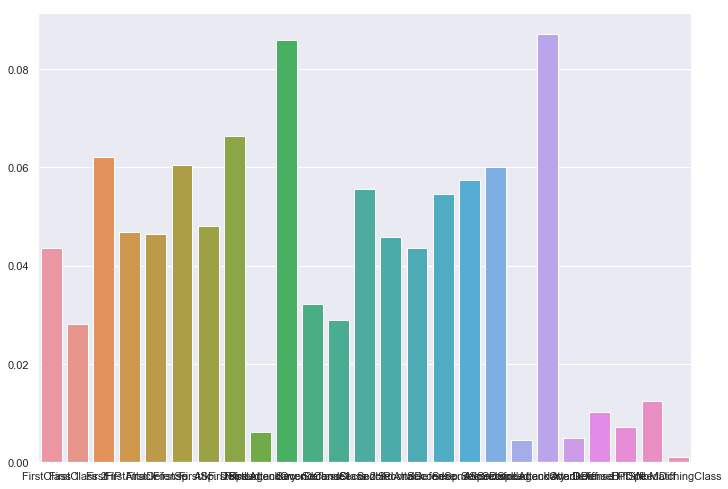

In [1231]:
sns.barplot(X_train.columns,GB1.feature_importances_)

In [1261]:
sel = X_train.columns.values[GB1.feature_importances_ > 0.062]
sel

array(['FirstHP', 'FirstSpeed', 'FirstAttackOverDefense',
       'SecondAttackOverDefense'], dtype=object)

It seems that without information on the id of the pokemon the model has similar performances

Let's try now with four features only

In [1243]:
X = CombatsMM.loc[:,sel]
y = CombatsMM.Winner

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

RF2 = RandomForestClassifier(min_samples_split=5,max_depth=12,
                            n_estimators=50,random_state=45)

RF2.fit(X_train,y_train)

PredsRFin = RF2.predict(X_train)
PredsRFout = RF2.predict(X_test)

#No class imbalance, so accuracy is fine
1 - sum(np.abs(PredsRFin - y_train))/len(y_train),1 - sum(np.abs(PredsRFout - y_test))/len(y_test)

RF2.score(X_train,y_train),RF2.score(X_test,y_test)

(0.753891660191011, 0.7049328253458993)

In [ ]:
#CV, 5-Fold
CVScores3 = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True,
                                                      random_state=32),
                           estimator=RF2)

In [1245]:
CVScores3.mean(),CVScores3.std()

(0.6934045029348664, 0.0020657152725407327)

In [ ]:
sns.barplot(X_train.columns,RF1.feature_importances_)

X_train.columns.values[RF1.feature_importances_ > 0.04]

GBDT

In [1246]:
GB2 = GradientBoostingClassifier(min_samples_split=5,max_leaf_nodes=10,
                                n_estimators=1000,random_state=5,
                                verbose=True)

GB2.fit(X_train,y_train)

PredsGBin = GB2.predict(X_train)
PredsGBout = GB2.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3798           14.19s
         2           1.3767           13.50s
         3           1.3729           13.72s
         4           1.3704           13.51s
         5           1.3673           14.37s
         6           1.3647           14.32s
         7           1.3627           13.73s
         8           1.3601           13.73s
         9           1.3569           13.70s
        10           1.3551           13.34s
        20           1.3375           12.73s
        30           1.3231           12.48s
        40           1.3116           12.16s
        50           1.2989           11.91s
        60           1.2888           11.80s
        70           1.2783           11.58s
        80           1.2694           11.20s
        90           1.2611           10.92s
       100           1.2526           11.09s
       200           1.1908            9.74s
       300           1.1449            8.29s
       40

In [1247]:
#Accuracy 
np.round(GB2.score(X_test,y_test),2),np.round(GB2.score(X_train,y_train),2)

(0.76, 0.78)

In [1248]:
#CV, 5-Fold
CVScores4 = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True,
                                                      random_state=32),
                           estimator=GB2,n_jobs=2)
CVScores4.mean(),CVScores4.std()

(0.7547476311353939, 0.002220135879248139)

In [1249]:
np.round(CVScores4.mean(),2),CVScores4.std()

(0.75, 0.002220135879248139)

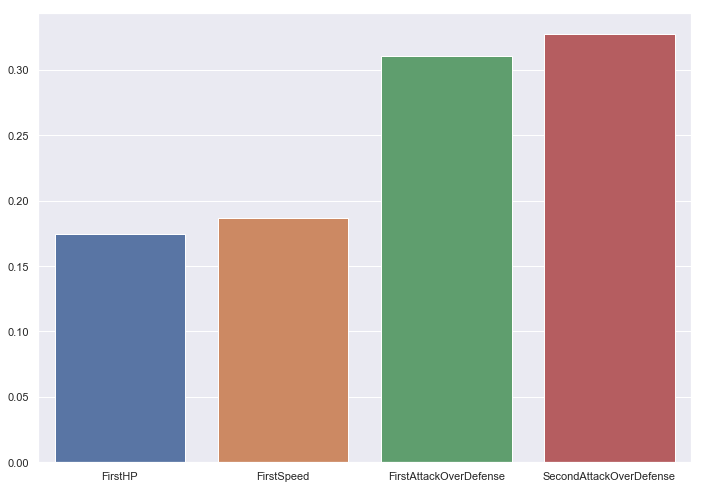

In [1250]:
sns.barplot(X_train.columns,GB2.feature_importances_)

We loose some accuracy using just this four features

Let's try a GBDT with a bit more features

In [1342]:
sel = np.array(['FirstClass 1', 'FirstHP', 'FirstAttack', 'FirstDefense',
       'FirstSp. Atk', 'FirstSp. Def', 'FirstSpeed',
       'FirstAttackOverDefense', 'SecondHP', 'SecondAttack',
       'SecondDefense', 'SecondSp. Atk', 'SecondSp. Def', 'SecondSpeed',
       'SecondAttackOverDefense'])
sel

array(['FirstClass 1', 'FirstHP', 'FirstAttack', 'FirstDefense',
       'FirstSp. Atk', 'FirstSp. Def', 'FirstSpeed',
       'FirstAttackOverDefense', 'SecondHP', 'SecondAttack',
       'SecondDefense', 'SecondSp. Atk', 'SecondSp. Def', 'SecondSpeed',
       'SecondAttackOverDefense'], dtype='<U23')

In [1343]:
X = CombatsMM.loc[:,sel]
y = CombatsMM.Winner

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

In [ ]:
GB3 = GradientBoostingClassifier(min_samples_split=5,max_leaf_nodes=10,
                                n_estimators=1000,random_state=5,
                                verbose=True)

GB3.fit(X_train,y_train)

In [ ]:
PredsGBin = GB3.predict(X_train)
PredsGBout = GB3.predict(X_test)

In [1266]:
#Accuracy 
np.round(GB3.score(X_test,y_test),2),np.round(GB3.score(X_train,y_train),2)

(0.83, 0.86)

In [1269]:
#CV, 5-Fold
CVScores5 = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True),
                           estimator=GB3,n_jobs=2)

In [1270]:
np.round(CVScores5.mean(),2),CVScores5.std()
#really low std, might be a problem with the splitter used for the cv...

(0.83, 0.0020743323224178506)

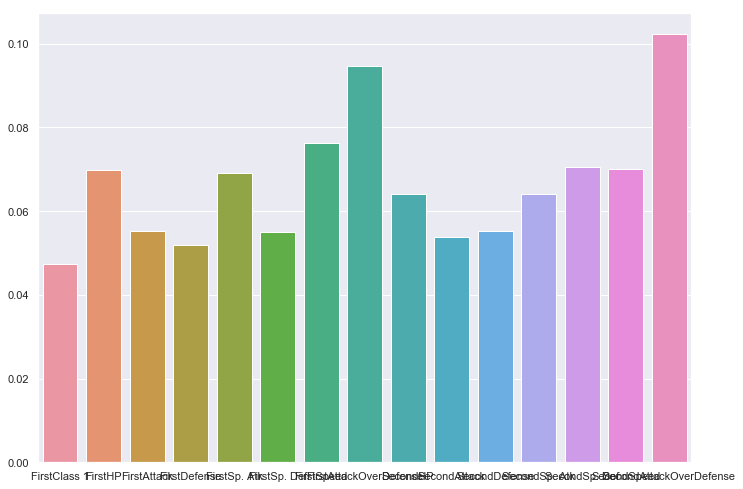

In [1272]:
sns.barplot(X_train.columns,GB3.feature_importances_)

Pretty much the same accuracy with these features

In [1360]:
sel = np.array( ['FirstHP', 'FirstAttack', 'FirstDefense',
       'FirstSp. Atk', 'FirstSp. Def', 'FirstSpeed',
       'FirstAttackOverDefense', 'SecondHP', 'SecondAttack',
       'SecondDefense', 'SecondSp. Atk', 'SecondSp. Def', 'SecondSpeed',
       'SecondAttackOverDefense'])

Let's do logistic regression with the selected variables 

In [1273]:
from sklearn.linear_model import LogisticRegression

In [1362]:
X = CombatsMM.loc[:,sel]
y = CombatsMM.Winner

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

In [1363]:
len(X_test),len(X_train),sum(y_train)

(9974, 39893, 18929)

In [1386]:
LogReg = LogisticRegression(random_state=43,C=0.1)

In [1387]:
LogReg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=43, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1388]:
#Accuracy 
np.round(LogReg.score(X_test,y_test),2),np.round(LogReg.score(X_train,y_train),2)

(0.55, 0.55)

In [1389]:
PredsRFin = LogReg.predict(X_train)
PredRFout = LogReg.predict(X_test)

#No class imbalance, so accuracy is fine
1 - sum(np.abs(PredsRFin - y_train))/len(y_train),1 - sum(np.abs(PredsRFout - y_test))/len(y_test)

(0.5471385957436141, 0.7049328253458993)

In [1390]:
#CV, 5-Fold
CVScores5 = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True),
                           estimator=LogReg,n_jobs=2)

In [1656]:
np.round(CVScores5.mean(),2),CVScores5.std()


(0.55, 0.003338674641876304)

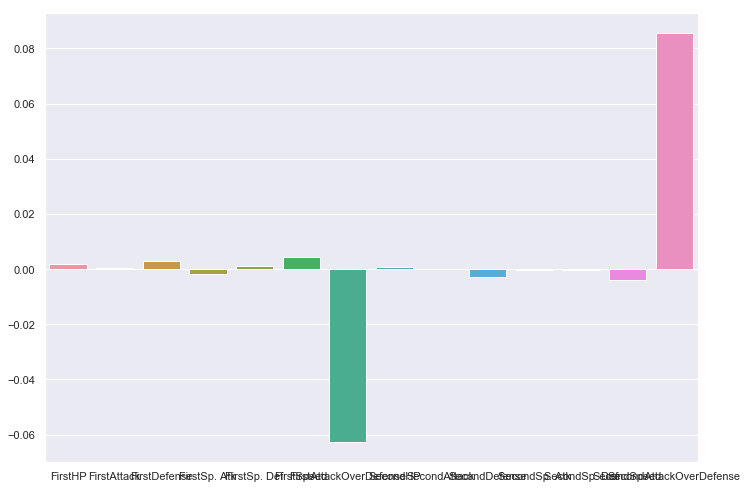

In [1392]:
sns.barplot(X_train.columns,LogReg.coef_[0])

In [1397]:
sel = X_train.columns.values[np.abs(LogReg.coef_[0])> 0.04]
sel

array(['FirstAttackOverDefense', 'SecondAttackOverDefense'], dtype=object)

Trying with just the two features above

In [1398]:
X = CombatsMM.loc[:,sel]
y = CombatsMM.Winner

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

len(X_test),len(X_train),sum(y_train)

(9974, 39893, 18929)

In [1399]:
LogReg = LogisticRegression(random_state=34)

LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=34, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1400]:
#Accuracy 
np.round(LogReg.score(X_test,y_test),2),np.round(LogReg.score(X_train,y_train),2)

(0.54, 0.53)

In [1401]:
PredsRFin = LogReg.predict(X_train)
PredRFout = LogReg.predict(X_test)

#No class imbalance, so accuracy is fine
1 - sum(np.abs(PredsRFin - y_train))/len(y_train),1 - sum(np.abs(PredsRFout - y_test))/len(y_test)

(0.5291153836512672, 0.7049328253458993)

In [1402]:
#CV, 5-Fold
CVScores5 = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True),
                           estimator=LogReg,n_jobs=2)

In [1403]:
np.round(CVScores5.mean(),2),CVScores5.std()
#really low std, might be a problem with the splitter used for the cv...

(0.53, 0.00038247511878082)

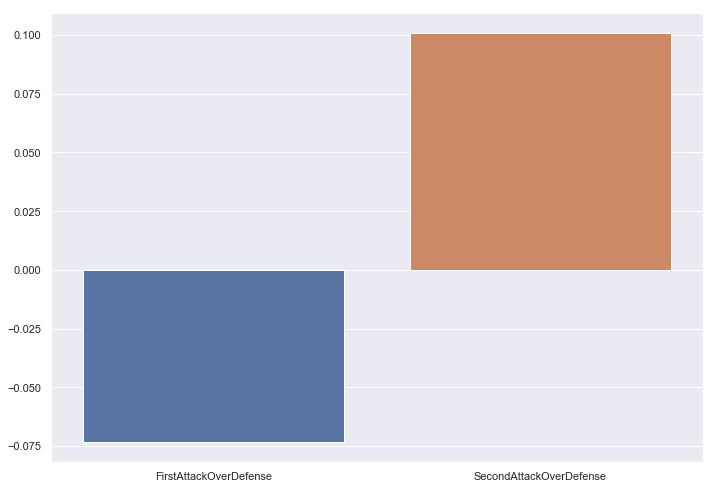

In [1404]:
sns.barplot(X_train.columns,LogReg.coef_[0])

it seems that even if we put all features the logistic regression perfomances stay the same 
Next I try with all the features, maybe one sould use OneHotEncoder for some features, not sure how the LabelEncoder is handled by logistic regression (One hot makes sense, not sure if LogisticRegression handles this internally)

In [1405]:
X = CombatsMM.loc[:,CombatsMM.columns != "Winner"]
y = CombatsMM.Winner

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

In [1406]:
len(X_test),len(X_train),sum(y_train)

(9974, 39893, 18929)

In [1407]:
LogReg = LogisticRegression(random_state=34)

LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=34, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1408]:
#Accuracy 
np.round(LogReg.score(X_test,y_test),2),np.round(LogReg.score(X_train,y_train),2)

(0.56, 0.55)

In [1409]:
PredsRFin = LogReg.predict(X_train)
PredRFout = LogReg.predict(X_test)

#No class imbalance, so accuracy is fine
1 - sum(np.abs(PredsRFin - y_train))/len(y_train),1 - sum(np.abs(PredsRFout - y_test))/len(y_test)

(0.553380292281854, 0.7049328253458993)

In [1410]:
#CV, 5-Fold
CVScores5 = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True),
                           estimator=LogReg,n_jobs=2)

In [1411]:
np.round(CVScores5.mean(),2),CVScores5.std()

(0.55, 0.003338674641876304)

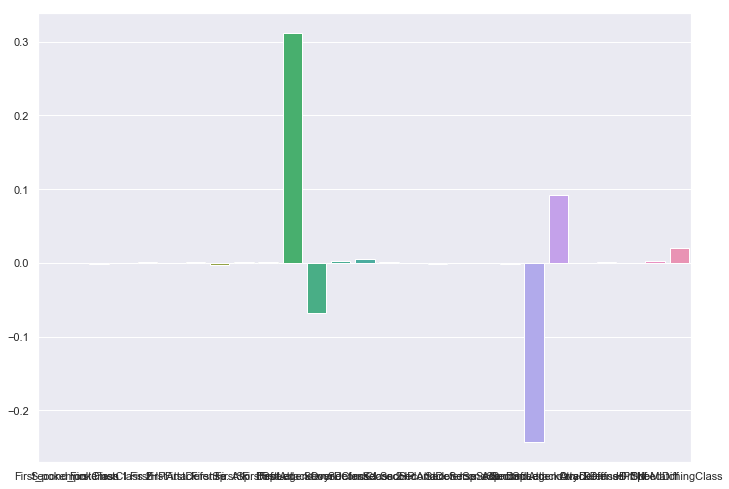

In [1443]:
sns.barplot(X_train.columns,LogReg.coef_[0])

This does not look so good, maybe we should do better feature engineering, e.g. combining somehow HPs, Speeds,Attacks and Defense...

The gradient booosting tree yields the better results


Next I train some MLPs on numerical features but the results were not so good

In [1444]:
from sklearn.neural_network import MLPClassifier

In [1451]:
sel = np.array( ['FirstHP', 'FirstAttack', 'FirstDefense',
       'FirstSp. Atk', 'FirstSp. Def', 'FirstSpeed',
       'FirstAttackOverDefense', 'SecondHP', 'SecondAttack',
       'SecondDefense', 'SecondSp. Atk', 'SecondSp. Def', 'SecondSpeed',
       'SecondAttackOverDefense'])

In [1522]:
X = CombatsMM.loc[:,sel]
y = CombatsMM.Winner

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

In [1476]:
MLP = MLPClassifier(activation="identity",
                    hidden_layer_sizes=(1000,50,25,1),
                    verbose=True)

In [1477]:
MLP.fit(X_train,y_train)

Iteration 1, loss = 1.58460315
Iteration 2, loss = 0.76383115
Iteration 3, loss = 0.73135096
Iteration 4, loss = 0.71977680
Iteration 5, loss = 0.70717929
Iteration 6, loss = 0.69984032
Iteration 7, loss = 0.70028311
Iteration 8, loss = 0.69642916
Iteration 9, loss = 0.69491171
Iteration 10, loss = 0.69171166
Iteration 11, loss = 0.69244728
Iteration 12, loss = 0.69086935
Iteration 13, loss = 0.69108176
Iteration 14, loss = 0.68984448
Iteration 15, loss = 0.68874767
Iteration 16, loss = 0.68853396
Iteration 17, loss = 0.69031333
Iteration 18, loss = 0.69050777
Iteration 19, loss = 0.69014778
Iteration 20, loss = 0.68860069
Iteration 21, loss = 0.68770828
Iteration 22, loss = 0.68797385
Iteration 23, loss = 0.68978592
Iteration 24, loss = 0.68796009
Iteration 25, loss = 0.68776767
Iteration 26, loss = 0.68813693
Iteration 27, loss = 0.68894852
Iteration 28, loss = 0.68834394
Iteration 29, loss = 0.68758457
Iteration 30, loss = 0.68783991
Iteration 31, loss = 0.68959907
Iteration 32, los

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 50, 25, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [1467]:
MLP.score(X_test,y_test)

0.6276318427912573

In [1466]:
pd.Series(MLP.predict(X_test))

0       0
1       1
2       0
3       0
4       1
5       1
6       1
7       0
8       1
9       1
10      1
11      1
12      0
13      0
14      0
15      0
16      0
17      1
18      1
19      0
20      0
21      0
22      1
23      0
24      0
25      1
26      0
27      0
28      0
29      1
       ..
9944    0
9945    0
9946    1
9947    1
9948    1
9949    1
9950    0
9951    1
9952    0
9953    1
9954    1
9955    1
9956    0
9957    0
9958    1
9959    0
9960    0
9961    1
9962    0
9963    1
9964    1
9965    0
9966    0
9967    0
9968    1
9969    1
9970    0
9971    0
9972    0
9973    1
Length: 9974, dtype: int64

With Keras to have more control on architecture

In [1591]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import Callback

In [1596]:
# Credit to Piotr Migdal, package livelossplot, to visualize loss during training
from IPython.display import clear_output
from IPython.display import clear_output

class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [1607]:
MLP = Sequential()

MLP.add(Dense(input_shape=(14,),activation="relu",units=50))
MLP.add(Dropout(0.2))
MLP.add(Dense(activation="relu",units=25))
MLP.add(Dense(activation="sigmoid",units=1))
MLP.compile(loss="binary_crossentropy",optimizer="adam",
            metrics=["accuracy"])

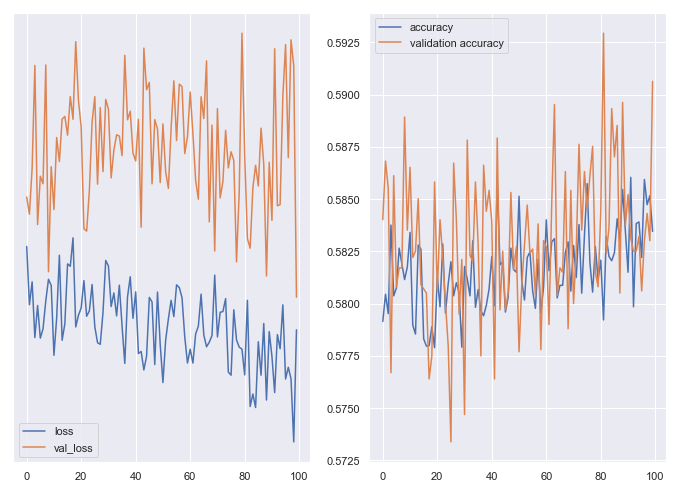

In [1611]:
MLP.fit(X_train,y_train,batch_size=128,
        validation_data=(X_test, y_test),
        callbacks=[plot],
        verbose=0,
        epochs=100)

I also tried to fit a Decision tree but the results are not so good (overfitting)

In [1657]:
from sklearn.tree import DecisionTreeClassifier

In [1733]:
X = CombatsMM.loc[:,CombatsMM.columns != "Winner"]
y = CombatsMM.Winner

In [1659]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

In [1660]:
len(X_test),len(X_train),sum(y_train)

(9974, 39893, 18929)

In [1661]:
TR = DecisionTreeClassifier()

TR.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [1662]:
#Accuracy 
np.round(TR.score(X_test,y_test),2),np.round(TR.score(X_train,y_train),2)

(0.65, 1.0)

In [ ]:
PredsRFin = LogReg.predict(X_train)
PredRFout = LogReg.predict(X_test)

In [1664]:
#No class imbalance, so accuracy is fine
1 - sum(np.abs(PredsRFin - y_train))/len(y_train),1 - sum(np.abs(PredsRFout - y_test))/len(y_test)

(0.553380292281854, 0.7049328253458993)

In [ ]:
#CV, 5-Fold
CVScores5 = cross_val_score(X=X,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True),
                           estimator=LogReg,n_jobs=2)

In [1917]:
np.round(CVScores5.mean(),2),CVScores5.std()

(0.88, 0.0033109020261634743)

Finally let's try to one hot encode some categorical variables and use Logistic regression

In [1905]:
X = CombatsMM.loc[:,CombatsMM.columns != "Winner"]
y = CombatsMM.Winner

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

In [1906]:
from sklearn.preprocessing import OneHotEncoder

In [1907]:
X.First_pokemon =X.First_pokemon.map(pd.Series(Pokemon.Name,index=Pokemon.pid))

In [1908]:
X.Second_pokemon =X.Second_pokemon.map(pd.Series(Pokemon.Name,index=Pokemon.pid))

In [1909]:
oneh = OneHotEncoder()
XX = oneh.fit_transform(X[["First_pokemon","Second_pokemon"]])

In [1910]:
XX_train,XX_test,yy_train,yy_test = train_test_split(XX,y,random_state=23,test_size = 0.2)

In [1911]:
LogReg = LogisticRegression(fit_intercept=False)
LogReg.fit(XX_train,yy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1912]:
LogReg.score(XX_train,yy_train),LogReg.score(XX_test,yy_test)

(0.8971749429724513, 0.8694605975536395)

In [1915]:
#CV, 5-Fold
CVScores5 = cross_val_score(X=XX,y=y,cv=StratifiedKFold(n_splits=5,shuffle=True),
                           estimator=LogReg,n_jobs=2)

It seems to have good performances, and it simple, it just gives weights to pokemons, so it is the best model, but it is not scalable to new pokemons, if we want to predict the issue of a fight the two pokemons have to have an history of fights, we can not predict just depending on their characteristics.

In [ ]:


#We add the coefficients as features and visualize the linear separation 

In [1918]:
corresp = pd.DataFrame(np.transpose([oneh.get_feature_names(),LogReg.coef_[0]]),columns=["name","coeff"])
corresp

name      coeff
0                  x0_Abomasnow  -0.121356
1                       x0_Abra   -2.53376
2                      x0_Absol  -0.816987
3                   x0_Accelgor     2.3731
4      x0_Aegislash Blade Forme    1.95015
5     x0_Aegislash Shield Forme   -1.18736
6                 x0_Aerodactyl   0.138437
7                     x0_Aggron    0.74349
8                      x0_Aipom    1.51139
9                   x0_Alakazam  -0.515881
10                 x0_Alomomola -0.0222052
11                   x0_Altaria  -0.502812
12                    x0_Amaura    1.30896
13                   x0_Ambipom    1.02878
14                 x0_Amoonguss   -1.88879
15                  x0_Ampharos   0.471357
16                   x0_Anorith   -2.83775
17                     x0_Arbok    1.11336
18                  x0_Arcanine    -1.0971
19                    x0_Arceus  -0.984248
20                    x0_Archen  -0.773865
21                  x0_Archeops    2.02733
22                   x0_Ariados   -1.98058
23                   x0_Armaldo  -0.713786
24                x0_Aromatisse   -1.52706
25                      x0_Aron    1.25546
26                  x0_Articuno    2.67754
27                    x0_Audino   -1.78694
28                   x0_Aurorus     1.6158
29                      x0_Axew   0.603151
...                         ...        ...
1536                  x1_Weedle    2.12731
1537              x1_Weepinbell    1.78363
1538                 x1_Weezing    -2.1448
1539              x1_Whimsicott  0.0869551
1540              x1_Whirlipede   0.604098
1541                x1_Whiscash  -0.562519
1542                 x1_Whismur    -1.3533
1543              x1_Wigglytuff    2.79753
1544                 x1_Wingull  -0.368347
1545               x1_Wobbuffet    2.05493
1546                  x1_Woobat    -0.9858
1547                  x1_Wooper     1.8144
1548    x1_Wormadam Plant Cloak    2.37985
1549    x1_Wormadam Sandy Cloak    1.89875
1550    x1_Wormadam Trash Cloak   -2.86939
1551                 x1_Wurmple   0.286599
1552                  x1_Wynaut   0.519509
1553                    x1_Xatu    1.35336
1554                  x1_Yamask  -0.108729
1555                   x1_Yanma    1.39977
1556                 x1_Yanmega   -1.12736
1557                x1_Zangoose    2.50868
1558                  x1_Zapdos     -3.046
1559               x1_Zebstrika   0.417142
1560                  x1_Zekrom  -0.449303
1561               x1_Zigzagoon  -0.715178
1562                 x1_Zoroark  -0.393337
1563                   x1_Zorua  -0.568735
1564                   x1_Zubat    1.69127
1565                x1_Zweilous   -1.88135

[1566 rows x 2 columns]

In [ ]:
X.First_pokemon = "x0_" + X.First_pokemon

In [1807]:
X.Second_pokemon = "x1_" + X.Second_pokemon

In [1815]:
a = X.First_pokemon.map(pd.Series(LogReg.coef_[0][:782],index=oneh.get_feature_names()[:782]))
b = X.Second_pokemon.map(pd.Series(LogReg.coef_[0][782:],index=oneh.get_feature_names()[782:]))

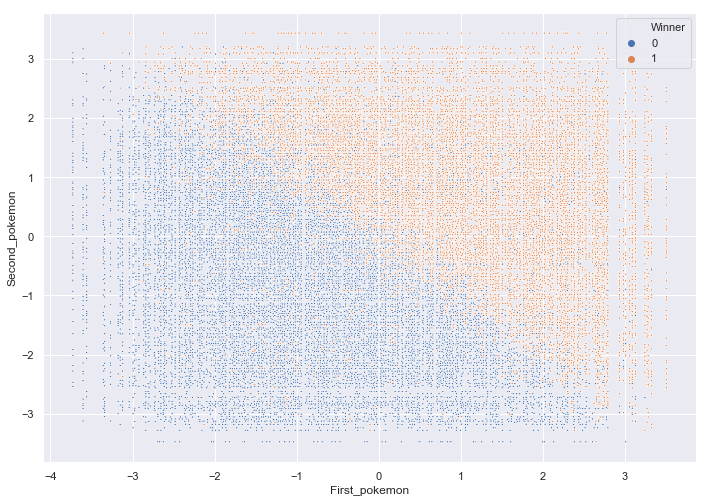

In [1828]:
sns.scatterplot(a,b,data=CombatsMM,hue="Winner",s=5)

In [1867]:
#look at if the coefficients are the same for same pokemon
Diff = list()
for N in Pokemon.Name:
    if len(corresp.loc[corresp.name.str.contains(N)]) == 2:
        print(corresp.loc[corresp.name.str.contains(N)])
        Diff.append(corresp.loc[corresp.name.str.contains(N),"coeff"].sum())

            name     coeff
297   x0_Ivysaur -0.965944
1080  x1_Ivysaur  0.674899
                  name     coeff
441   x0_Mega Venusaur  0.751478
1224  x1_Mega Venusaur -0.232227
              name      coeff
84   x0_Charmander  -0.360176
867  x1_Charmander  0.0707331
              name      coeff
85   x0_Charmeleon  0.0505904
868  x1_Charmeleon  -0.142471
                     name    coeff
408   x0_Mega Charizard X  2.63981
1191  x1_Mega Charizard X -2.32444
                     name    coeff
409   x0_Mega Charizard Y   2.2595
1192  x1_Mega Charizard Y -2.07501
             name    coeff
655   x0_Squirtle -1.69108
1438  x1_Squirtle  1.68857
              name     coeff
749   x0_Wartortle -0.360818
1532  x1_Wartortle  0.622892
                   name    coeff
405   x0_Mega Blastoise  -1.6457
1188  x1_Mega Blastoise  2.00782
            name    coeff
79   x0_Caterpie -2.92133
862  x1_Caterpie  1.79231
            name     coeff
451   x0_Metapod  0.113856
1234  x1_Metapod -0.677968
    

           name     coeff
287   x0_Horsea  0.455802
1070  x1_Horsea -0.122432
           name    coeff
592   x0_Seadra  2.38324
1375  x1_Seadra -1.79339
            name    coeff
242   x0_Goldeen  1.08892
1025  x1_Goldeen   -1.285
            name    coeff
593   x0_Seaking  1.96033
1376  x1_Seaking  -2.2341
           name    coeff
661   x0_Staryu  1.22423
1444  x1_Staryu -1.08753
            name     coeff
660   x0_Starmie  0.835728
1443  x1_Starmie   -1.0383
             name    coeff
468   x0_Mr. Mime  2.22687
1251  x1_Mr. Mime  -2.0934
            name    coeff
591   x0_Scyther  1.94185
1374  x1_Scyther -2.83408
         name    coeff
304   x0_Jynx -1.92132
1087  x1_Jynx  2.03352
              name     coeff
173  x0_Electabuzz  0.997579
956  x1_Electabuzz -0.648164
           name     coeff
372   x0_Magmar   1.01691
1155  x1_Magmar -0.989974
                name     coeff
430   x0_Mega Pinsir  -0.87436
1213  x1_Mega Pinsir  0.771468
           name     coeff
685   x0_Tauros  -0.189

            name    coeff
314   x0_Kingdra  1.30698
1097  x1_Kingdra -1.89262
           name     coeff
511   x0_Phanpy  0.871846
1294  x1_Phanpy -0.529877
           name    coeff
147  x0_Donphan  1.58432
930  x1_Donphan -1.78442
             name    coeff
534   x0_Porygon2 -1.66916
1317  x1_Porygon2   1.1632
             name    coeff
656   x0_Stantler  3.00891
1439  x1_Stantler -2.82362
             name    coeff
637   x0_Smeargle  2.17717
1420  x1_Smeargle -1.41077
            name     coeff
718   x0_Tyrogue  0.396737
1501  x1_Tyrogue  -1.02495
              name    coeff
281   x0_Hitmontop -1.75311
1064  x1_Hitmontop  1.79026
             name    coeff
638   x0_Smoochum -1.25915
1421  x1_Smoochum  1.23558
          name      coeff
177  x0_Elekid  0.0300199
960  x1_Elekid   0.108867
          name     coeff
369   x0_Magby  0.230124
1152  x1_Magby  -0.60516
            name    coeff
458   x0_Miltank  2.22956
1241  x1_Miltank  -2.6594
           name     coeff
54   x0_Blissey   1.304

             name    coeff
774   x0_Zangoose -2.41411
1557  x1_Zangoose  2.50868
            name    coeff
601   x0_Seviper -1.63466
1384  x1_Seviper  1.60944
             name      coeff
362   x0_Lunatone   0.382191
1145  x1_Lunatone  0.0373411
            name     coeff
646   x0_Solrock  -1.37687
1429  x1_Solrock  0.346864
            name     coeff
37   x0_Barboach  -1.82032
820  x1_Barboach  0.801563
             name     coeff
758   x0_Whiscash  0.436336
1541  x1_Whiscash -0.562519
            name     coeff
110  x0_Corphish -0.228472
893  x1_Corphish -0.296969
             name     coeff
115  x0_Crawdaunt  -1.90507
898  x1_Crawdaunt  0.865067
          name     coeff
34   x0_Baltoy  -1.81318
817  x1_Baltoy  0.709789
           name     coeff
100  x0_Claydol -0.673278
883  x1_Claydol -0.466249
           name     coeff
348   x0_Lileep  0.659738
1131  x1_Lileep -0.806331
           name    coeff
113  x0_Cradily -2.86371
896  x1_Cradily  1.64542
           name    coeff
16   x0_Anor

           name     coeff
665   x0_Stunky   1.11136
1448  x1_Stunky -0.907308
             name     coeff
628   x0_Skuntank  0.912063
1411  x1_Skuntank -0.224954
           name     coeff
63   x0_Bronzor -0.894484
846  x1_Bronzor  0.135809
            name    coeff
62   x0_Bronzong  1.44402
845  x1_Bronzong -1.27628
          name    coeff
57   x0_Bonsly  1.99782
840  x1_Bonsly -2.71102
             name    coeff
459   x0_Mime Jr. -1.31614
1242  x1_Mime Jr.  1.53414
            name     coeff
265   x0_Happiny  -1.11162
1048  x1_Happiny  0.637397
          name      coeff
86   x0_Chatot -0.0227276
869  x1_Chatot   0.143437
              name    coeff
652   x0_Spiritomb  1.54124
1435  x1_Spiritomb -1.29732
          name     coeff
229   x0_Gible -0.841434
1012  x1_Gible    1.1992
           name     coeff
218   x0_Gabite  0.592025
1001  x1_Gabite  -1.06103
                  name      coeff
411   x0_Mega Garchomp -0.0135612
1194  x1_Mega Garchomp  -0.206768
             name     coeff
471

             name     coeff
672   x0_Swadloon -0.742174
1455  x1_Swadloon  0.801465
             name    coeff
342   x0_Leavanny  1.59107
1125  x1_Leavanny -1.77559
             name     coeff
729   x0_Venipede -0.512451
1512  x1_Venipede   1.05713
               name     coeff
757   x0_Whirlipede  -1.19955
1540  x1_Whirlipede  0.604098
              name     coeff
588   x0_Scolipede -0.598634
1371  x1_Scolipede  0.689593
            name     coeff
112  x0_Cottonee -0.807947
895  x1_Cottonee   1.47266
               name      coeff
756   x0_Whimsicott  -0.044282
1539  x1_Whimsicott  0.0869551
            name    coeff
510   x0_Petilil  1.41652
1293  x1_Petilil -1.33911
              name     coeff
349   x0_Lilligant  -2.18036
1132  x1_Lilligant  0.729885
            name     coeff
38   x0_Basculin   -2.2085
821  x1_Basculin  0.897936
            name    coeff
580   x0_Sandile -1.36385
1363  x1_Sandile  1.34225
             name     coeff
325   x0_Krokorok -0.790196
1108  x1_Krokorok  0

            name    coeff
194  x0_Fennekin  1.65782
977  x1_Fennekin -1.64476
           name    coeff
59   x0_Braixen -1.59166
842  x1_Braixen  1.67542
           name     coeff
134  x0_Delphox -0.480812
917  x1_Delphox  0.944684
           name     coeff
212  x0_Froakie  0.902213
995  x1_Froakie -0.619047
             name    coeff
213  x0_Frogadier -0.67198
996  x1_Frogadier  1.10275
             name     coeff
255   x0_Greninja  0.199097
1038  x1_Greninja   0.28258
            name    coeff
67   x0_Bunnelby -1.56876
850  x1_Bunnelby  1.20679
             name     coeff
142  x0_Diggersby -0.623814
925  x1_Diggersby  0.441568
              name    coeff
203  x0_Fletchling  2.17825
986  x1_Fletchling -2.05821
               name     coeff
202  x0_Fletchinder -0.176218
985  x1_Fletchinder  0.266357
               name    coeff
682   x0_Talonflame  1.50562
1465  x1_Talonflame  -1.8223
               name    coeff
585   x0_Scatterbug  1.26001
1368  x1_Scatterbug -1.71907
           name 

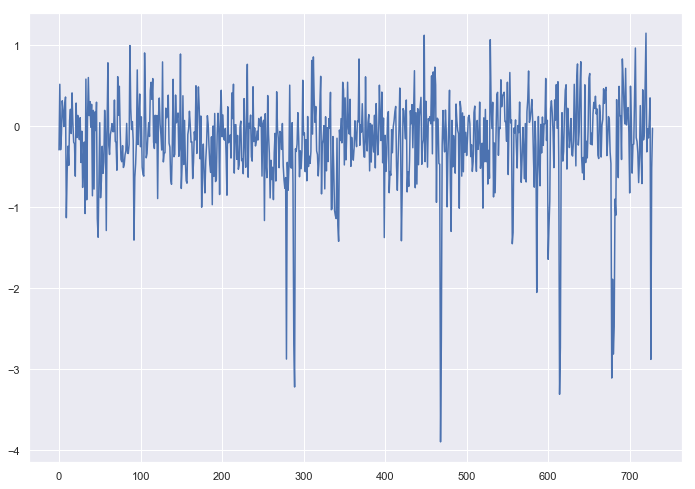

In [1869]:
plt.plot(Diff)

not always the same, maybe first and second have some meaning

In [ ]:
#predict some outcome of fights

In [1884]:
corresp.loc[corresp.name.str.contains("Golbat")]

name     coeff
241   x0_Golbat  -1.34279
1024  x1_Golbat  0.484885

In [1885]:
corresp.loc[corresp.name.str.contains("Kakuna")]

name     coeff
308   x0_Kakuna  0.479622
1091  x1_Kakuna -0.406972

In [1876]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [1886]:
sigmoid(-1.34 -0.4)

0.1493129345308437

In [1902]:
LogReg.predict(oneh.transform(np.array(["Yanma","Shroomish"]).reshape(1,-1)))

array([0])